In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:
#execute this only once...if you run again skip this part
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/5_train.zip",'r') as zip_ref:#folder path
  #creates new folder 'cats_dogs_images' and saves all images present intrain.zip
  zip_ref.extractall("/content/drive/MyDrive/project_folder")#empty folder path


In [ ]:
files_list=os.listdir("/content/drive/MyDrive/project_folder/train")#method is used to count number of files
#count number of files
num_files=len(files_list)

In [ ]:
print(num_files)

25000


In [ ]:
import os,shutil,pathlib

original_dir=pathlib.Path(r"/content/drive/MyDrive/project_folder/train")#copy of first folder we created
new_base_dir=pathlib.Path(r"/content/drive/MyDrive/segregated_folder2")#copy of 3 folder to segregate the items

def make_subset(subset_name,start_index,end_index):
  for category in ("cat","dog"):
    dir=new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames=[f"{category}.{i}.jpg" for i in range(start_index,end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,dst=dir/fname)

make_subset("train",start_index=0,end_index=1000)
make_subset("validation",start_index=1000,end_index=1500)
make_subset("test",start_index=1500,end_index=2500)


In [4]:
import cv2
import numpy as np
import os

labels=['cat','dog']
img_size=224

def get_data(data_dir):
  images=[]
  image_labels=[]
  for label in labels:
    path=os.path.join(data_dir,label)
    class_num=labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))[...,::-1]
        resized_arr=cv2.resize(img_arr,(img_size,img_size))
        images.append(resized_arr)
        image_labels.append(class_num)
      except Exception as e:
        print(f"Error loding image{img}:{e}")
    return np.array(images),np.array(image_labels)#we are converting images to rgb and reshaping the image

In [5]:
train_images,train_labels=get_data("/content/drive/MyDrive/segregated_folder2/train")
val_images,val_labels=get_data("/content/drive/MyDrive/segregated_folder2/validation")

In [ ]:
train_images[0].shape

(224, 224, 3)

In [ ]:
train_images.shape

(1000, 224, 224, 3)

In [ ]:
train_labels.shape

(1000,)

In [ ]:
val_images.shape

(500, 224, 224, 3)

In [ ]:
val_labels.shape

(500,)

In [ ]:
np.unique(train_labels)

array([0])

In [7]:
#normalize the data
x_train=np.array(train_images).astype('float32')/255
x_val=np.array(val_images).astype('float32')/255

In [8]:
y_train=np.array(train_labels)
y_val=np.array(val_labels)

In [ ]:
len(x_train)

1000

In [ ]:
x_train.shape

(1000, 224, 224, 3)

In [ ]:
x_val.shape

(500, 224, 224, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
#X_train,y_train=training images and labels
#x_val,y_val=validation images and labels
#normalize and augment data
train_datagen=ImageDataGenerator(rotation_range=20,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator()
train_generator=train_datagen.flow(x_train,y_train,batch_size=32)
val_generate=val_datagen.flow(x_val,y_val,batch_size=32)

In [10]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,Dropout
vgg_base=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg_base.layers:
  layer.trainable=False
vg_model=Sequential()
vg_model.add(vgg_base)
vg_model.add(Flatten())
vg_model.add(Dense(256,activation='relu'))
vg_model.add(Dropout(0.5))
vg_model.add(Dense(128,activation='relu'))
vg_model.add(Dense(1,activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vg_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=vg_model.fit(train_generator,epochs=10,validation_data=val_generate)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/step - accuracy: 1.0000 - loss: 1.2994e-07 - val_accuracy: 1.0000 - val_loss: 2.2578e-09
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 1.0000 - loss: 1.2454e-07 - val_accuracy: 1.0000 - val_loss: 2.0582e-09
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 1.0000 - loss: 4.9454e-08 - val_accuracy: 1.0000 - val_loss: 1.9114e-09
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 625ms/step - accuracy: 1.0000 - loss: 8.1548e-08 - val_accuracy: 1.0000 - val_loss: 1.8296e-09
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 540ms/step - accuracy: 1.0000 - loss: 5.3131e-08 - val_accuracy: 1.0000 - val_loss: 1.7427e-09
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 615ms/step - accuracy: 1.0000 - loss: 6.0503e-08 - val_accuracy: 1.0000 - val_loss: 1.6024e-09
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 625ms/step - accuracy: 1.0000 - loss: 9.9397e-08 - val_accuracy: 1.0000 - val_loss: 1.4454e-09
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s

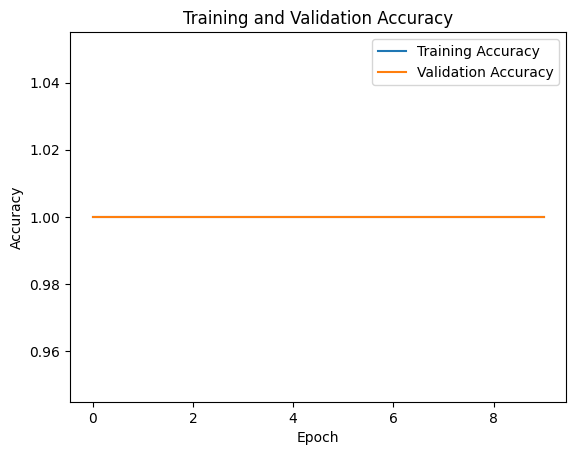

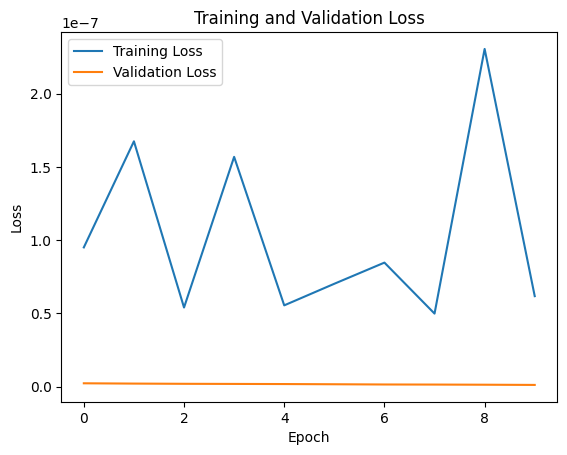

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
#load pretrained Resnet 50 model
resnet_base=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
#freeze the base model layers
for layer in resnet_base.layers:
  layer.trainable=False
#create a new model
resnet_model=Sequential()
resnet_model.add(resnet_base)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(256,activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))
#model summary
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,145,281 (92.11 MB)

 Trainable params: 557,569 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [2]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history2=resnet_model.fit(train_generator,epochs=5,validation_data=val_generate)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 775ms/step - accuracy: 0.9975 - loss: 0.1381 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 7.9417e-04
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.3907e-04
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 1.0000 - loss: 6.1212e-04 - val_accuracy: 1.0000 - val_loss: 2.3582e-04


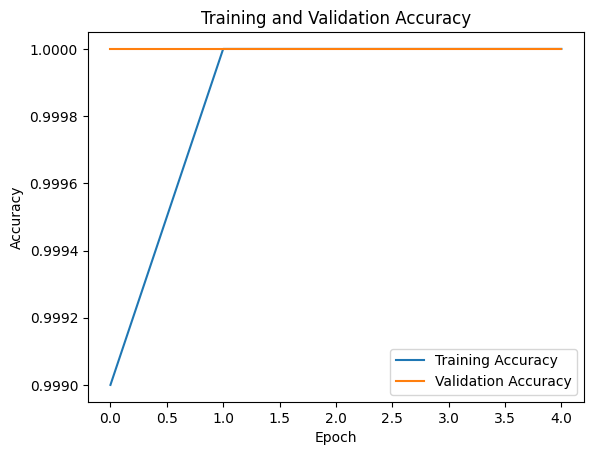

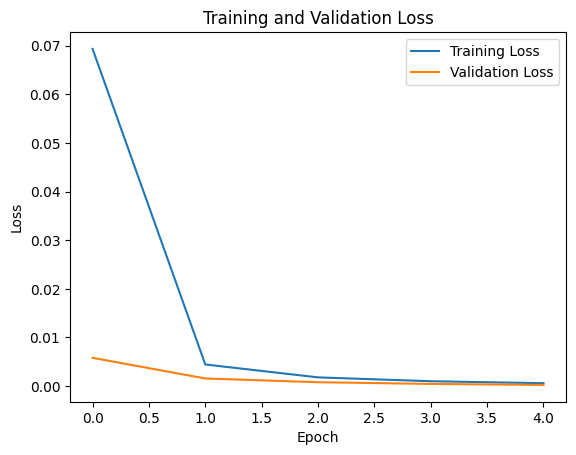

In [12]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
#load pretrained MobileNetV2 model
MobileNetV2_base=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
#freeze the model
for layer in MobileNetV2_base.layers:
  layer.trainable=False
#create a new model
MobileNetV2_model=Sequential()
MobileNetV2_model.add(MobileNetV2_base)
MobileNetV2_model.add(GlobalAveragePooling2D())
MobileNetV2_model.add(Dense(256,activation='relu'))
MobileNetV2_model.add(Dropout(0.5))
MobileNetV2_model.add(Dense(128,activation='relu'))
MobileNetV2_model.add(Dense(1,activation='sigmoid'))
#model summary
MobileNetV2_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,945 (9.99 MB)

 Trainable params: 360,961 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
MobileNetV2_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history3=MobileNetV2_model.fit(train_generator,epochs=5,validation_data=val_generate)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 695ms/step - accuracy: 0.8564 - loss: 0.3310 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 6.5207e-04
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.3902e-04


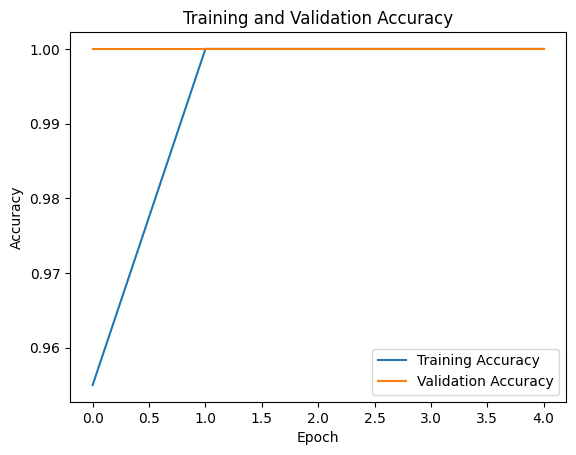

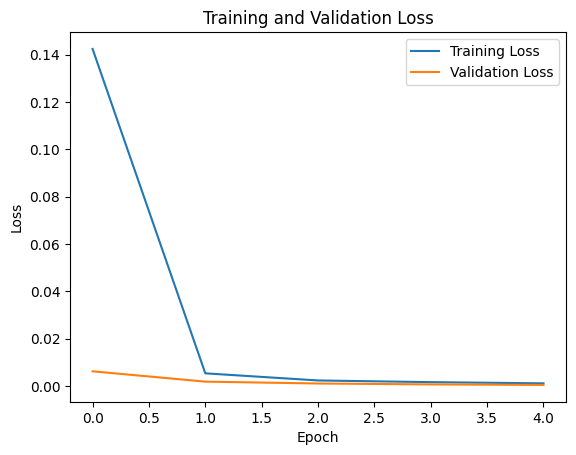

In [16]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss,acc=MobileNetV2_model.evaluate(x_val,y_val)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 9.1807e-06
